In [73]:
from utils.load_results import *
from utils.plot_helpers import *

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [74]:
datasets = ['(3,4)', '(3,8)', '(3,16)', '(4,4)', '(4,8)', '(5,4)']
n_values = [4, 8, 16, 4, 8, 4]
n_attributes = [3, 3, 3, 4, 4, 5]
n_epochs = 300
n_datasets = len(datasets)
paths = ['results/' + d + '_game_size_10_vsf_3' for d in datasets]

## training

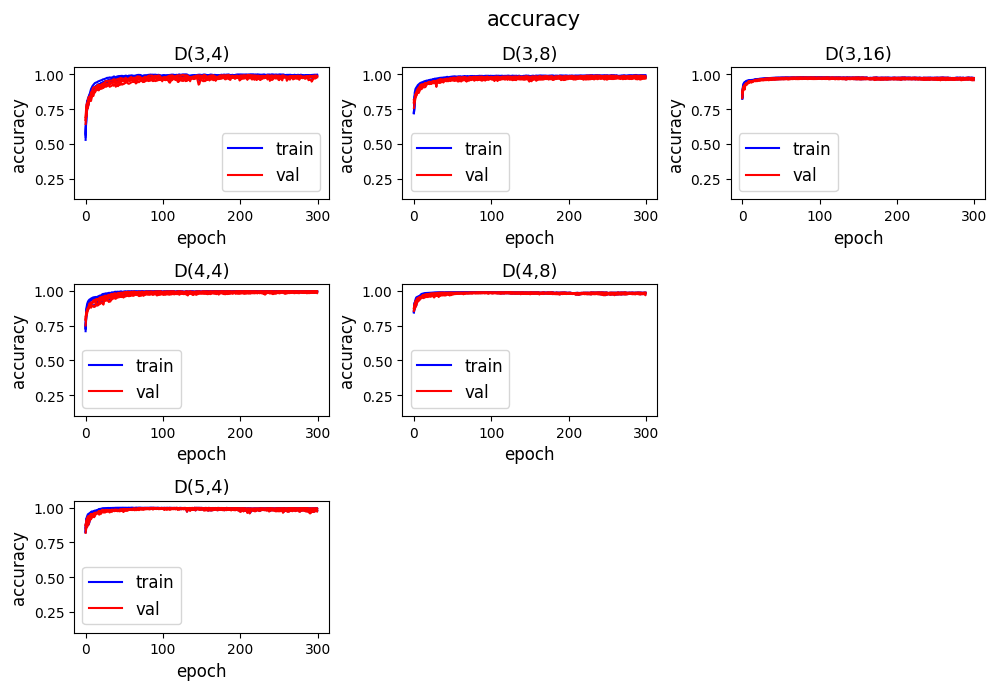

In [75]:
all_accuracies = load_accuracies(paths, n_runs=5, n_epochs=300, val_steps=1, zero_shot=False, context_unaware=True)
plot_training_trajectory(all_accuracies['train_acc'], all_accuracies['val_acc'], ylim=(0.1, 1.05), steps=(1, 1))

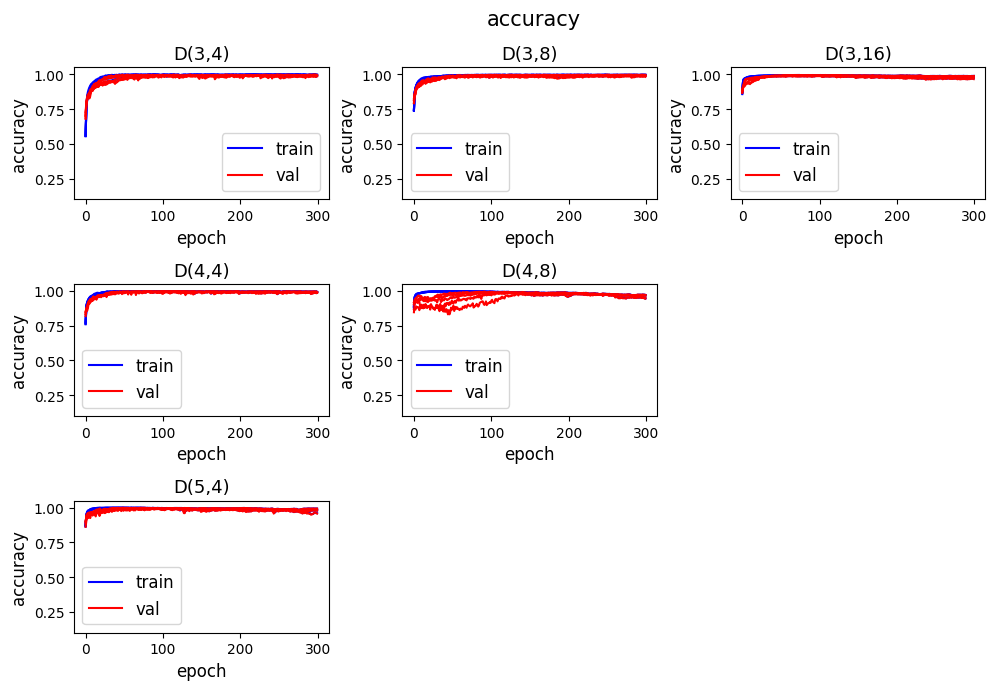

In [76]:
plot_training_trajectory(all_accuracies['cu_train_acc'], all_accuracies['cu_val_acc'], ylim=(0.1, 1.05), steps=(1, 1))

## final accuracies 

In [77]:
all_accuracies = load_accuracies(paths, n_runs=5, n_epochs=300, val_steps=1, zero_shot=False, context_unaware=True)
#accuracies = [all_accuracies['train_acc'], all_accuracies['val_acc'], 
#              all_accuracies['zs_acc_objects'], all_accuracies['zs_acc_abstraction']]
accuracies = [all_accuracies['train_acc'], all_accuracies['val_acc'],
              all_accuracies['cu_train_acc'], all_accuracies['cu_val_acc']]

In [78]:
# get accuracy means and sds for table representation
final_accuracies_train = {}
for i, d in enumerate(datasets):
    gather_accuracies = []
    for run in range(5):
        gather_accuracies.append(all_accuracies['train_acc'][i][run][-1])
    final_accuracies_train[d] = (round(np.mean(gather_accuracies), 3), round(np.std(gather_accuracies), 3))
final_accuracies_train

{'(3,4)': (0.993, 0.003),
 '(3,8)': (0.984, 0.006),
 '(3,16)': (0.969, 0.005),
 '(4,4)': (0.995, 0.003),
 '(4,8)': (0.984, 0.004),
 '(5,4)': (0.985, 0.007)}

In [79]:
# context unaware
final_accuracies_train = {}
for i, d in enumerate(datasets):
    gather_accuracies = []
    for run in range(5):
        gather_accuracies.append(all_accuracies['cu_train_acc'][i][run][-1])
    final_accuracies_train[d] = (round(np.mean(gather_accuracies), 3), round(np.std(gather_accuracies), 3))
final_accuracies_train

{'(3,4)': (0.995, 0.002),
 '(3,8)': (0.993, 0.003),
 '(3,16)': (0.981, 0.007),
 '(4,4)': (0.992, 0.002),
 '(4,8)': (0.961, 0.011),
 '(5,4)': (0.98, 0.011)}

In [80]:
final_accuracies_val = {}
for i, d in enumerate(datasets):
    gather_accuracies = []
    for run in range(5):
        gather_accuracies.append(all_accuracies['val_acc'][i][run][-1])
    final_accuracies_val[d] = (round(np.mean(gather_accuracies), 3), round(np.std(gather_accuracies), 3))
final_accuracies_val

{'(3,4)': (0.983, 0.004),
 '(3,8)': (0.977, 0.006),
 '(3,16)': (0.968, 0.006),
 '(4,4)': (0.993, 0.005),
 '(4,8)': (0.982, 0.006),
 '(5,4)': (0.984, 0.008)}

In [81]:
# context unaware
final_accuracies_val = {}
for i, d in enumerate(datasets):
    gather_accuracies = []
    for run in range(5):
        gather_accuracies.append(all_accuracies['cu_val_acc'][i][run][-1])
    final_accuracies_val[d] = (round(np.mean(gather_accuracies), 3), round(np.std(gather_accuracies), 3))
final_accuracies_val

{'(3,4)': (0.99, 0.003),
 '(3,8)': (0.989, 0.004),
 '(3,16)': (0.979, 0.008),
 '(4,4)': (0.989, 0.002),
 '(4,8)': (0.961, 0.011),
 '(5,4)': (0.979, 0.012)}

[[0.99349755 0.99438304 0.99714994 0.9889524  0.9908964 ]
 [0.98823529 0.99381393 0.98065805 0.97503847 0.98295194]
 [0.97349459 0.95933652 0.97269094 0.96832794 0.97250068]
 [0.9922365  0.99858236 0.99129426 0.99679643 0.99820399]
 [0.98338503 0.9853335  0.97586703 0.98537797 0.98848629]
 [0.98294199 0.98025817 0.99261707 0.99467164 0.97581184]]
[[0.98275286 0.98499173 0.98797667 0.97770166 0.98076302]
 [0.98188025 0.98672408 0.97329718 0.96902198 0.97452313]
 [0.97126365 0.95693058 0.97113037 0.96678734 0.97201091]
 [0.99034393 0.99682349 0.98482996 0.99488181 0.99803853]
 [0.98044735 0.98585504 0.97075027 0.98500317 0.98783386]
 [0.98131657 0.97808754 0.99170095 0.99396187 0.97247827]]
[[0.99338567 0.99139458 0.99773884 0.99573094 0.99513215]
 [0.9941197  0.99828142 0.98847181 0.99465328 0.99095821]
 [0.98827749 0.97643638 0.98627943 0.96951079 0.98552912]
 [0.99209821 0.99132347 0.99465734 0.99133861 0.98864907]
 [0.97190267 0.96858537 0.945041   0.95161664 0.96885568]
 [0.99310809

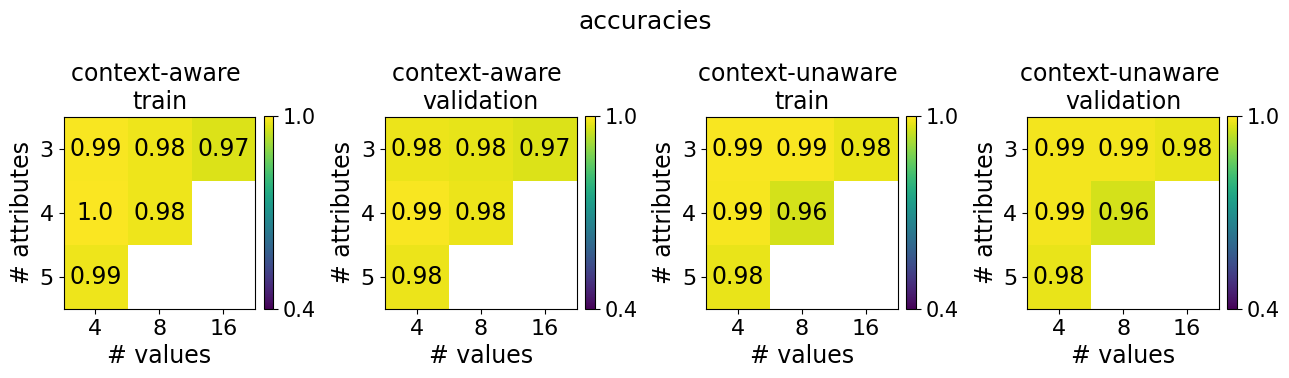

In [82]:
plot_heatmap(accuracies, 'mean', plot_dims=(1,4), ylims=(0.4, 1.0), figsize=(13, 3.5), suptitle='accuracies', 
             fontsize=17)

## entropy scores 
### context-aware

In [83]:
entropy_scores = load_entropies(paths)
entropies = [entropy_scores['NMI'], entropy_scores['effectiveness'], entropy_scores['consistency']]

/Users/kkobrock/Projects/phdproject1/emergent-abstractions/utils/load_results.py:150: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result_dict[key] = np.array(result_dict[key])


In [84]:
entropy_dict = {}
for i, score in enumerate(list(entropy_scores.keys())[:3]):
    results = entropies[i]
    mean = np.nanmean(results, axis=-1)
    sd = np.std(results, axis=-1)
    for idx, d in enumerate(datasets):
        entropy_dict[d + score] = (round(mean[idx], 3), round(sd[idx], 3))
entropy_dict


{'(3,4)NMI': (0.899, 0.014),
 '(3,8)NMI': (0.904, 0.029),
 '(3,16)NMI': (0.79, 0.016),
 '(4,4)NMI': (0.91, 0.014),
 '(4,8)NMI': (0.86, 0.015),
 '(5,4)NMI': (0.856, 0.019),
 '(3,4)effectiveness': (0.922, 0.019),
 '(3,8)effectiveness': (0.898, 0.036),
 '(3,16)effectiveness': (0.732, 0.026),
 '(4,4)effectiveness': (0.958, 0.017),
 '(4,8)effectiveness': (0.861, 0.023),
 '(5,4)effectiveness': (0.883, 0.013),
 '(3,4)consistency': (0.877, 0.012),
 '(3,8)consistency': (0.91, 0.028),
 '(3,16)consistency': (0.858, 0.01),
 '(4,4)consistency': (0.867, 0.015),
 '(4,8)consistency': (0.859, 0.016),
 '(5,4)consistency': (0.83, 0.026)}

In [85]:
# from generic to specific
entropies_hierarchical = [entropy_scores['NMI_hierarchical'], entropy_scores['effectiveness_hierarchical'], entropy_scores['consistency_context_dep']]
entropy_dict_context_dep = {}
for i, score in enumerate(list(entropy_scores.keys())[3:6]):
    results = entropies_hierarchical[i]
    mean = np.mean(results, axis=-1)
    #sd = results.std(axis=-1)
    for idx, d in enumerate(datasets):
        entropy_dict_context_dep[d + score] = mean[idx] #(mean[idx], sd[idx])
entropy_dict_context_dep


{'(3,4)NMI_hierarchical': array([0.94890859, 0.92758896, 0.90534409]),
 '(3,8)NMI_hierarchical': array([0.92025451, 0.91729138, 0.9021918 ]),
 '(3,16)NMI_hierarchical': array([0.80965867, 0.82107998, 0.78268653]),
 '(4,4)NMI_hierarchical': array([0.89898419, 0.92974464, 0.92363052, 0.90444903]),
 '(4,8)NMI_hierarchical': array([0.89941368, 0.89876042, 0.88287844, 0.86174954]),
 '(5,4)NMI_hierarchical': array([0.87118133, 0.89839789, 0.89997813, 0.8789201 , 0.8675404 ]),
 '(3,4)effectiveness_hierarchical': array([1.        , 0.97895852, 0.96614494]),
 '(3,8)effectiveness_hierarchical': array([0.95942609, 0.92709728, 0.90257714]),
 '(3,16)effectiveness_hierarchical': array([0.86847827, 0.79152011, 0.72441223]),
 '(4,4)effectiveness_hierarchical': array([1.        , 0.99595116, 0.99034655, 0.98505777]),
 '(4,8)effectiveness_hierarchical': array([0.95415805, 0.93001123, 0.90805992, 0.87561448]),
 '(5,4)effectiveness_hierarchical': array([0.99437522, 0.97592677, 0.96252488, 0.94200112, 0.94

In [86]:
# from coarse to fine context
entropies_context_dep = [entropy_scores['NMI_context_dep'], entropy_scores['effectiveness_context_dep'], entropy_scores['consistency_context_dep']]
entropy_dict_context_dep = {}
for i, score in enumerate(list(entropy_scores.keys())[6:9]):
    results = entropies_context_dep[i]
    mean = np.mean(results, axis=-1)
    #sd = results.std(axis=-1)
    for idx, d in enumerate(datasets):
        entropy_dict_context_dep[d + score] = mean[idx] #(mean[idx], sd[idx])
entropy_dict_context_dep


{'(3,4)NMI_context_dep': array([0.90332371, 0.93180372, 0.96880153]),
 '(3,8)NMI_context_dep': array([0.91597131, 0.9205717 , 0.92794413]),
 '(3,16)NMI_context_dep': array([0.82241285, 0.81979134, 0.81667296]),
 '(4,4)NMI_context_dep': array([0.92113838, 0.93168469, 0.94466602, 0.96450319]),
 '(4,8)NMI_context_dep': array([0.88119425, 0.88954746, 0.90299492, 0.92305986]),
 '(5,4)NMI_context_dep': array([0.86095964, 0.88283948, 0.90683619, 0.92674768, 0.94887214]),
 '(3,4)effectiveness_context_dep': array([0.90031442, 0.93836468, 0.98610164]),
 '(3,8)effectiveness_context_dep': array([0.90183189, 0.90872151, 0.91186393]),
 '(3,16)effectiveness_context_dep': array([0.7509223 , 0.75377959, 0.73505526]),
 '(4,4)effectiveness_context_dep': array([0.94901628, 0.9615572 , 0.97866162, 0.99641606]),
 '(4,8)effectiveness_context_dep': array([0.85057926, 0.86675704, 0.89558557, 0.89844289]),
 '(5,4)effectiveness_context_dep': array([0.84903374, 0.88639729, 0.92420916, 0.95413568, 0.98824696]),
 '

In [87]:
# from generic&coarse to specific&fine
entropies_concept_x_context = [entropy_scores['NMI_concept_x_context'], entropy_scores['effectiveness_concept_x_context'], entropy_scores['consistency_concept_x_context']]
entropy_dict_conc_x_cont = {}
for i, score in enumerate(list(entropy_scores.keys())[9:]):
    results = entropies_context_dep[i]
    mean = np.mean(results, axis=-1)
    #sd = results.std(axis=-1)
    for idx, d in enumerate(datasets):
        entropy_dict_conc_x_cont[d + score] = mean[idx] #(mean[idx], sd[idx])
entropy_dict_conc_x_cont

{'(3,4)NMI_concept_x_context': array([0.90332371, 0.93180372, 0.96880153]),
 '(3,8)NMI_concept_x_context': array([0.91597131, 0.9205717 , 0.92794413]),
 '(3,16)NMI_concept_x_context': array([0.82241285, 0.81979134, 0.81667296]),
 '(4,4)NMI_concept_x_context': array([0.92113838, 0.93168469, 0.94466602, 0.96450319]),
 '(4,8)NMI_concept_x_context': array([0.88119425, 0.88954746, 0.90299492, 0.92305986]),
 '(5,4)NMI_concept_x_context': array([0.86095964, 0.88283948, 0.90683619, 0.92674768, 0.94887214]),
 '(3,4)effectiveness_concept_x_context': array([0.90031442, 0.93836468, 0.98610164]),
 '(3,8)effectiveness_concept_x_context': array([0.90183189, 0.90872151, 0.91186393]),
 '(3,16)effectiveness_concept_x_context': array([0.7509223 , 0.75377959, 0.73505526]),
 '(4,4)effectiveness_concept_x_context': array([0.94901628, 0.9615572 , 0.97866162, 0.99641606]),
 '(4,8)effectiveness_concept_x_context': array([0.85057926, 0.86675704, 0.89558557, 0.89844289]),
 '(5,4)effectiveness_concept_x_context':

[[0.88920206 0.91751552 0.90867788 0.87815639 0.90206712]
 [0.92733579 0.94390244 0.87992392 0.86471845 0.90288738]
 [0.80800484 0.76300603 0.80368264 0.78800158 0.78526188]
 [0.89377992 0.92699578 0.89321783 0.92034887 0.91800308]
 [0.87080597 0.8619244  0.83183635 0.8594345  0.87620371]
 [0.87464695 0.82599447 0.87604222 0.85556282 0.84635523]]
[[0.9091803  0.94487157 0.94323277 0.89812798 0.9151514 ]
 [0.91862108 0.95081748 0.89340562 0.84214595 0.8855177 ]
 [0.76310954 0.69131424 0.75714456 0.71610172 0.73258168]
 [0.92949888 0.9739771  0.94958738 0.96495294 0.97356585]
 [0.88679474 0.84302252 0.83120595 0.85847375 0.88650162]
 [0.89110091 0.8607743  0.89193809 0.89644992 0.87590227]]
[[0.87008293 0.89169894 0.87656531 0.85905369 0.8893517 ]
 [0.93621742 0.93708725 0.86684307 0.88853433 0.92095212]
 [0.85851292 0.85128765 0.85631634 0.87595105 0.84610562]
 [0.8607046  0.88433832 0.84316569 0.87968618 0.86844   ]
 [0.85538353 0.88169335 0.8324677  0.8603974  0.86614229]
 [0.85878961

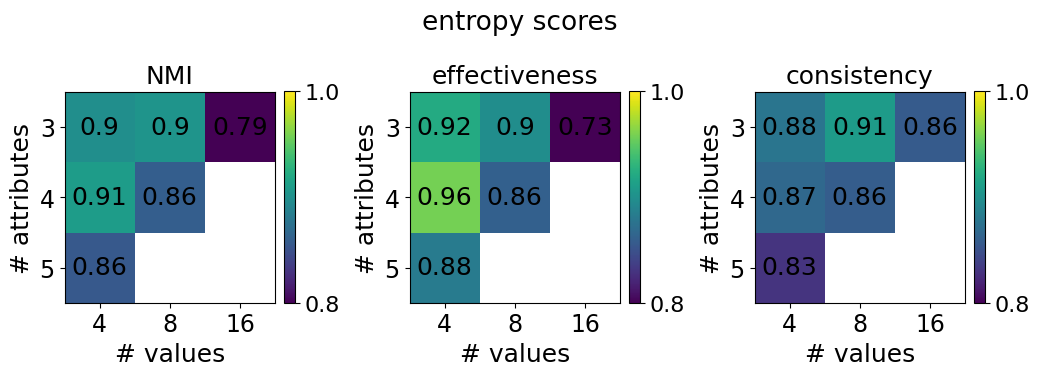

In [88]:
plot_heatmap(entropies, 'mean', plot_dims=(1,3), ylims=(0.8, 1.0), figsize=(10.5, 3.5), 
             titles = ('NMI', 'effectiveness', 'consistency'), suptitle='entropy scores')

/Users/kkobrock/Projects/phdproject1/emergent-abstractions/utils/plot_helpers.py:134: RuntimeWarning: Mean of empty slice
  values = np.nanmean(results_ls, axis=0)


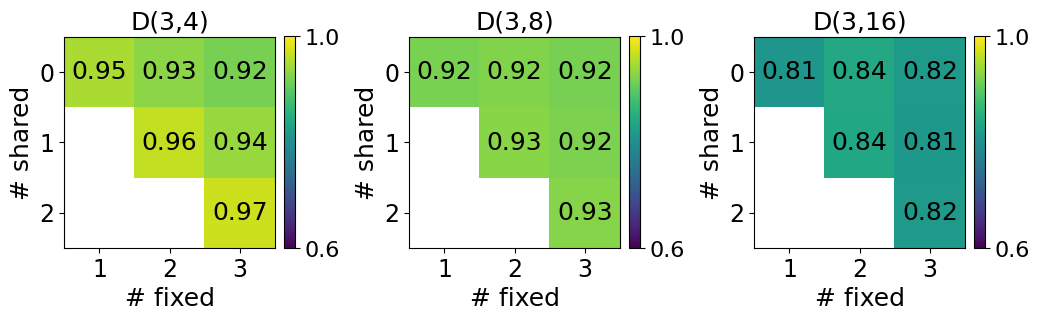

In [89]:
plot_heatmap_concept_x_context(entropies_concept_x_context, score='NMI', mode='mean', plot_dims=(1,3), heatmap_size=(3,3), figsize=(10.5, 3.5))

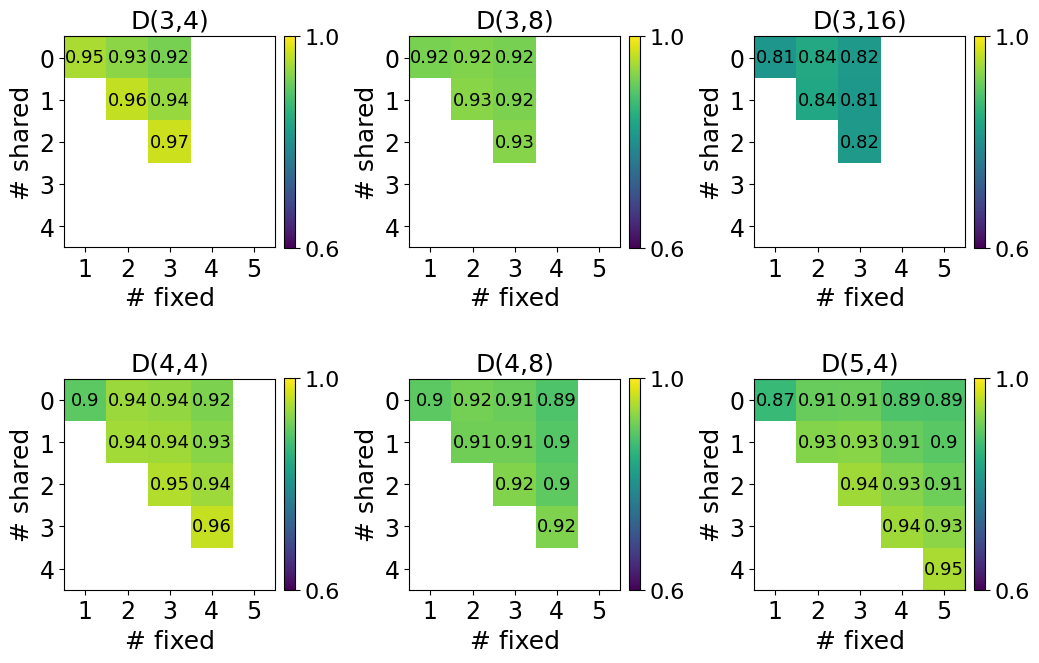

In [90]:
plot_heatmap_concept_x_context(entropies_concept_x_context, score='NMI', mode='mean', plot_dims=(2,3), heatmap_size=(5,5), 
                                figsize=(10.5, 7), inner_fontsize_fctr=-5)

In [91]:
for i in range(6):
    print("Dataset:", datasets[i])
    results = entropies_concept_x_context[0][i]
    results_ls = [res.tolist() for res in results]
    print(np.nanmean(results_ls, axis=0))

Dataset: (3,4)
[0.94890859        nan        nan 0.929736   0.96323978        nan
 0.91852207 0.93831591 0.96880153]
Dataset: (3,8)
[0.92025451        nan        nan 0.92417961 0.92928985        nan
 0.91783214 0.9207806  0.92794413]
Dataset: (3,16)
[0.80965867        nan        nan 0.84097218 0.83756583        nan
 0.81693783 0.81350048 0.81667296]
Dataset: (4,4)
[0.89898419        nan        nan        nan 0.93967544 0.94453014
        nan        nan 0.9357477  0.94323767 0.95321201        nan
 0.92074671 0.92912079 0.94116584 0.96450319]
Dataset: (4,8)
[0.89941368        nan        nan        nan 0.91661246 0.91350162
        nan        nan 0.90800137 0.91272822 0.92378034        nan
 0.89002395 0.89524042 0.90099615 0.92305986]
Dataset: (5,4)
[0.87118133        nan        nan        nan        nan 0.90739177
 0.92585912        nan        nan        nan 0.90789256 0.92857188
 0.94247368        nan        nan 0.88924452 0.90717831 0.92718922
 0.94230053        nan 0.88822798 0.898084

/var/folders/k6/03rlh8jd6nqbws0_xg9jh20w0000gq/T/ipykernel_90863/2552627212.py:5: RuntimeWarning: Mean of empty slice
  print(np.nanmean(results_ls, axis=0))


### context-unaware

[[0.97428818 0.95841722 0.9705805  0.97138553 0.97612048]
 [0.97789336 0.98908436 0.95019016 0.97616512 0.96674176]
 [0.95603326 0.92061085 0.9515017  0.89176951 0.95112168]
 [0.95328017 0.93967517 0.94963885 0.95822495 0.93146983]
 [0.9281043  0.92901592 0.88233372 0.89438063 0.92366407]
 [0.95389958 0.88746171 0.93229843 0.92574545 0.93356378]]
[[0.96505297 0.97113155 0.99258561 0.98963375 0.98347052]
 [0.98057772 0.99253592 0.92929225 0.98136508 0.97252959]
 [0.93906933 0.88405436 0.93173884 0.82780497 0.93110939]
 [0.98149988 0.97309914 0.98718353 0.97523659 0.9697974 ]
 [0.92426386 0.91738041 0.86398006 0.88197872 0.91345952]
 [0.97136426 0.89671658 0.95796249 0.94928052 0.94160711]]
[[0.98370186 0.94603151 0.94952992 0.9537981  0.96887949]
 [0.97522365 0.98565672 0.9720496  0.97101999 0.96102241]
 [0.97362136 0.96032103 0.97212109 0.96644693 0.97201312]
 [0.92663783 0.90847105 0.91484535 0.94179663 0.89605659]
 [0.93197678 0.94095037 0.90148409 0.90713628 0.9340992 ]
 [0.93705183

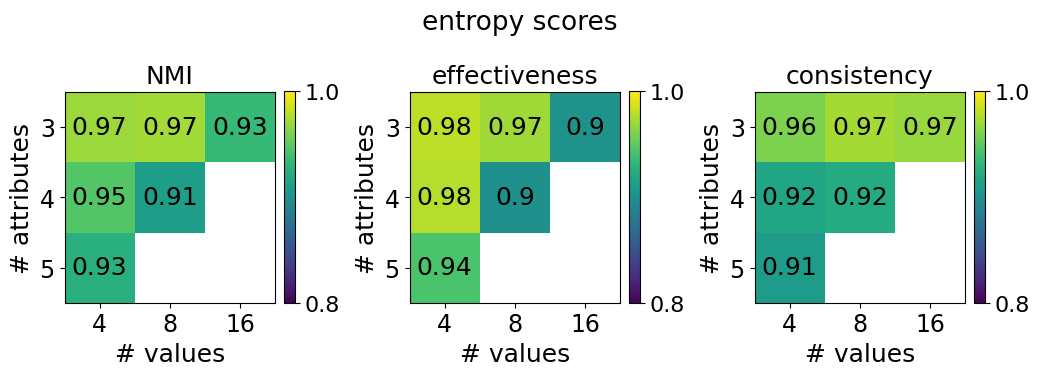

In [92]:
entropy_scores = load_entropies(paths, context_unaware=True)
entropies = [entropy_scores['NMI'], entropy_scores['effectiveness'], entropy_scores['consistency']]
plot_heatmap(entropies, 'mean', plot_dims=(1,3), ylims=(0.8, 1.0), figsize=(10.5, 3.5), 
             titles = ('NMI', 'effectiveness', 'consistency'), suptitle='entropy scores')

In [93]:
entropy_dict = {}
for i, score in enumerate(list(entropy_scores.keys())[:3]):
    results = entropies[i]
    mean = np.nanmean(results, axis=-1)
    sd = np.std(results, axis=-1)
    for idx, d in enumerate(datasets):
        entropy_dict[d + score] = (round(mean[idx], 3), round(sd[idx], 3))
entropy_dict


{'(3,4)NMI': (0.97, 0.006),
 '(3,8)NMI': (0.972, 0.013),
 '(3,16)NMI': (0.934, 0.025),
 '(4,4)NMI': (0.946, 0.01),
 '(4,8)NMI': (0.911, 0.019),
 '(5,4)NMI': (0.927, 0.022),
 '(3,4)effectiveness': (0.98, 0.011),
 '(3,8)effectiveness': (0.971, 0.022),
 '(3,16)effectiveness': (0.903, 0.042),
 '(4,4)effectiveness': (0.977, 0.006),
 '(4,8)effectiveness': (0.9, 0.023),
 '(5,4)effectiveness': (0.943, 0.025),
 '(3,4)consistency': (0.96, 0.014),
 '(3,8)consistency': (0.973, 0.008),
 '(3,16)consistency': (0.969, 0.005),
 '(4,4)consistency': (0.918, 0.016),
 '(4,8)consistency': (0.923, 0.016),
 '(5,4)consistency': (0.91, 0.02)}

In [94]:
# from generic to specific
entropies_hierarchical = [entropy_scores['NMI_hierarchical'], entropy_scores['effectiveness_hierarchical'], entropy_scores['consistency_context_dep']]
entropy_dict_context_dep = {}
for i, score in enumerate(list(entropy_scores.keys())[3:6]):
    results = entropies_hierarchical[i]
    mean = np.mean(results, axis=-1)
    #sd = results.std(axis=-1)
    for idx, d in enumerate(datasets):
        entropy_dict_context_dep[d + score] = mean[idx] #(mean[idx], sd[idx])
entropy_dict_context_dep

{'(3,4)NMI_hierarchical': array([0.97495252, 0.96230901, 0.97885057]),
 '(3,8)NMI_hierarchical': array([0.95566786, 0.96355173, 0.97603362]),
 '(3,16)NMI_hierarchical': array([0.89546736, 0.93537953, 0.93722978]),
 '(4,4)NMI_hierarchical': array([0.88172337, 0.93787901, 0.93950895, 0.95685839]),
 '(4,8)NMI_hierarchical': array([0.90683247, 0.91924478, 0.91585175, 0.92933934]),
 '(5,4)NMI_hierarchical': array([0.88338028, 0.91719535, 0.93769363, 0.93214178, 0.94580931]),
 '(3,4)effectiveness_hierarchical': array([1.        , 0.99752108, 0.99312908]),
 '(3,8)effectiveness_hierarchical': array([0.9909576 , 0.98520559, 0.97505305]),
 '(3,16)effectiveness_hierarchical': array([0.96300901, 0.93141013, 0.90662202]),
 '(4,4)effectiveness_hierarchical': array([0.99807347, 0.99791161, 0.99474267, 0.99578111]),
 '(4,8)effectiveness_hierarchical': array([0.98862512, 0.96643855, 0.94108026, 0.92808448]),
 '(5,4)effectiveness_hierarchical': array([0.99697889, 0.99015195, 0.9856295 , 0.97719849, 0.97

In [95]:
# from coarse to fine context
entropies_context_dep = [entropy_scores['NMI_context_dep'], entropy_scores['effectiveness_context_dep'], entropy_scores['consistency_context_dep']]
entropy_dict_context_dep = {}
for i, score in enumerate(list(entropy_scores.keys())[6:9]):
    results = entropies_context_dep[i]
    mean = np.mean(results, axis=-1)
    #sd = results.std(axis=-1)
    for idx, d in enumerate(datasets):
        entropy_dict_context_dep[d + score] = mean[idx] #(mean[idx], sd[idx])
entropy_dict_context_dep


{'(3,4)NMI_context_dep': array([0.97274731, 0.97255706, 0.98004654]),
 '(3,8)NMI_context_dep': array([0.97399075, 0.97370924, 0.97823801]),
 '(3,16)NMI_context_dep': array([0.93695954, 0.93721216, 0.94020304]),
 '(4,4)NMI_context_dep': array([0.95354645, 0.95484137, 0.95571797, 0.96389784]),
 '(4,8)NMI_context_dep': array([0.9194943 , 0.91991131, 0.92217913, 0.93721612]),
 '(5,4)NMI_context_dep': array([0.93788548, 0.93743391, 0.93840944, 0.94096276, 0.95534045]),
 '(3,4)effectiveness_context_dep': array([0.98166208, 0.98175605, 0.99294947]),
 '(3,8)effectiveness_context_dep': array([0.97255534, 0.9727718 , 0.97593455]),
 '(3,16)effectiveness_context_dep': array([0.90535445, 0.90542051, 0.90871776]),
 '(4,4)effectiveness_context_dep': array([0.97969398, 0.98116527, 0.9832203 , 0.99635727]),
 '(4,8)effectiveness_context_dep': array([0.90530056, 0.90564642, 0.90940185, 0.93279817]),
 '(5,4)effectiveness_context_dep': array([0.94934051, 0.94942802, 0.95044849, 0.95687792, 0.98093444]),
 '

In [96]:
# from generic&coarse to specific&fine
entropies_concept_x_context = [entropy_scores['NMI_concept_x_context'], entropy_scores['effectiveness_concept_x_context'], entropy_scores['consistency_concept_x_context']]
entropy_dict_conc_x_cont = {}
for i, score in enumerate(list(entropy_scores.keys())[9:]):
    results = entropies_context_dep[i]
    mean = np.mean(results, axis=-1)
    #sd = results.std(axis=-1)
    for idx, d in enumerate(datasets):
        entropy_dict_conc_x_cont[d + score] = mean[idx] #(mean[idx], sd[idx])
entropy_dict_conc_x_cont

{'(3,4)NMI_concept_x_context': array([0.97274731, 0.97255706, 0.98004654]),
 '(3,8)NMI_concept_x_context': array([0.97399075, 0.97370924, 0.97823801]),
 '(3,16)NMI_concept_x_context': array([0.93695954, 0.93721216, 0.94020304]),
 '(4,4)NMI_concept_x_context': array([0.95354645, 0.95484137, 0.95571797, 0.96389784]),
 '(4,8)NMI_concept_x_context': array([0.9194943 , 0.91991131, 0.92217913, 0.93721612]),
 '(5,4)NMI_concept_x_context': array([0.93788548, 0.93743391, 0.93840944, 0.94096276, 0.95534045]),
 '(3,4)effectiveness_concept_x_context': array([0.98166208, 0.98175605, 0.99294947]),
 '(3,8)effectiveness_concept_x_context': array([0.97255534, 0.9727718 , 0.97593455]),
 '(3,16)effectiveness_concept_x_context': array([0.90535445, 0.90542051, 0.90871776]),
 '(4,4)effectiveness_concept_x_context': array([0.97969398, 0.98116527, 0.9832203 , 0.99635727]),
 '(4,8)effectiveness_concept_x_context': array([0.90530056, 0.90564642, 0.90940185, 0.93279817]),
 '(5,4)effectiveness_concept_x_context':

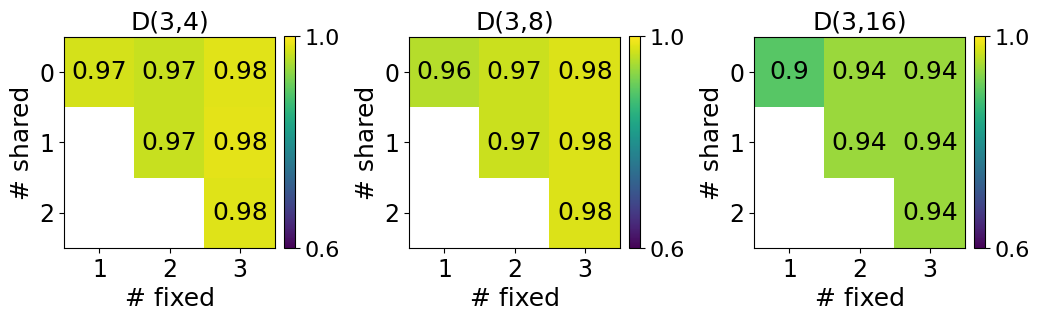

In [97]:
plot_heatmap_concept_x_context(entropies_concept_x_context, score='NMI', mode='mean', plot_dims=(1,3), heatmap_size=(3,3), figsize=(10.5, 3.5))

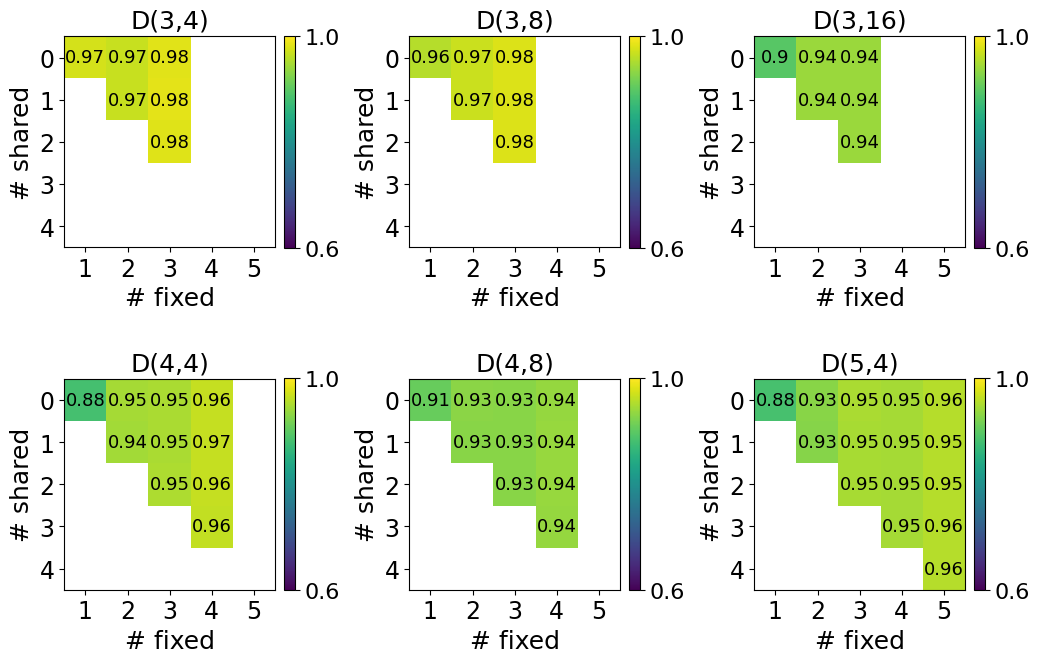

In [98]:
plot_heatmap_concept_x_context(entropies_concept_x_context, score='NMI', mode='mean', plot_dims=(2,3), heatmap_size=(5,5), 
                                figsize=(10.5, 7), inner_fontsize_fctr=-5)

In [99]:
for i in range(6):
    print("Dataset:", datasets[i])
    results = entropies_concept_x_context[0][i]
    results_ls = [res.tolist() for res in results]
    print(np.nanmean(results_ls, axis=0))

Dataset: (3,4)
[0.97495252        nan        nan 0.96612383 0.96656027        nan
 0.98266295 0.98301618 0.98004654]
Dataset: (3,8)
[0.95566786        nan        nan 0.9675339  0.96740814        nan
 0.97855189 0.97818668 0.97823801]
Dataset: (3,16)
[0.89546736        nan        nan 0.93955161 0.94042812        nan
 0.94036153 0.94023795 0.94020304]
Dataset: (4,4)
[0.88172337        nan        nan        nan 0.94646477 0.94483194
        nan        nan 0.94941223 0.94983275 0.95065689        nan
 0.96450211 0.96536547 0.96492018 0.96389784]
Dataset: (4,8)
[0.90683247        nan        nan        nan 0.93006834 0.92890661
        nan        nan 0.92880757 0.92932623 0.92897022        nan
 0.93730842 0.93775026 0.93779082 0.93721612]
Dataset: (5,4)
[0.88338028        nan        nan        nan        nan 0.92813229
 0.92762813        nan        nan        nan 0.94859257 0.94744274
 0.94814192        nan        nan 0.94574447 0.9454167  0.94550467
 0.9458112         nan 0.95580703 0.954976

/var/folders/k6/03rlh8jd6nqbws0_xg9jh20w0000gq/T/ipykernel_90863/2552627212.py:5: RuntimeWarning: Mean of empty slice
  print(np.nanmean(results_ls, axis=0))


### context-unaware/context-aware (toggle)

In [100]:
context_unaware = False # whether original or context_unaware simulations are evaluated
if context_unaware:
    setting = 'context_unaware'
else:
    setting = 'standard'

In [101]:
data_list, run_list, level_list = [], [], []
NMI_hierarchical, effectiveness_hierarchical, consistency_hierarchical = [], [], []

for d, data in enumerate(datasets):
    for run in range(5):
        
        scores = pickle.load(open(paths[d] + '/' + setting + '/' + str(run) + '/entropy_scores.pkl', 'rb'))
        
        for l, level in enumerate([1, 2, 3, 4, 5]):  
            
            data_list.append(data)
            run_list.append(run)
            level_list.append(level)
            
            try: 
                NMI_hierarchical.append(scores['normalized_mutual_info_hierarchical'][l])
                effectiveness_hierarchical.append(scores['effectiveness_hierarchical'][l])
                consistency_hierarchical.append(scores['consistency_hierarchical'][l])
            except: 
                NMI_hierarchical.append(np.nan)
                effectiveness_hierarchical.append(np.nan)
                consistency_hierarchical.append(np.nan)

entropy_dict_hierarchical = {'data': data_list, 'level': level_list, 'run': run_list, 'NI': NMI_hierarchical, 
                             'effectiveness': effectiveness_hierarchical, 'consistency': consistency_hierarchical}


In [102]:
all_hierarchical = {}
all_hierarchical['metric'] = ['NI'] * 150 + ['effectiveness'] * 150 + ['consistency'] * 150 # change to 25 for one dataset
all_hierarchical['value'] = (entropy_dict_hierarchical['NI'] + 
                             entropy_dict_hierarchical['effectiveness'] + 
                             entropy_dict_hierarchical['consistency'])
all_hierarchical['level'] = entropy_dict_hierarchical['level'] * 3

/Users/kkobrock/opt/miniconda3/envs/egg/lib/python3.9/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/kkobrock/opt/miniconda3/envs/egg/lib/python3.9/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/kkobrock/opt/miniconda3/envs/egg/lib/python3.9/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


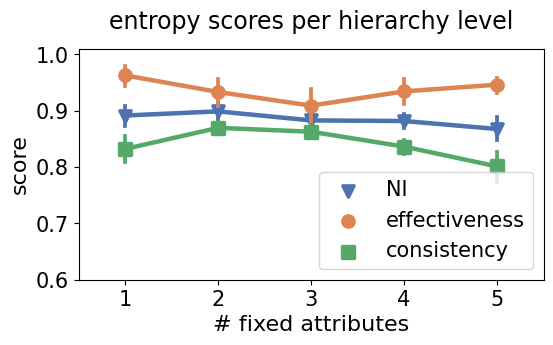

In [103]:
plt.figure(figsize=(6,3))
ax = sns.pointplot(x='level', y='value', data=all_hierarchical, hue='metric', 
                   markers=['v', 'o', 's'], palette='deep', scale=1.2)
plt.ylabel('score', fontsize=16)
plt.title('entropy scores per hierarchy level', fontsize=17, y=1.05)
plt.ylim([0.6,1.01])
plt.xticks(ticks=[0,1,2,3,4], labels=[1,2,3,4,5])
plt.yticks(ticks=[0.6,0.7, 0.8, 0.9, 1.0], fontsize=15)
plt.xlabel('# fixed attributes', fontsize=16)
plt.xticks(fontsize=15)
plt.legend(fontsize=15, loc='lower right')
plt.show()

In [104]:
data_list, run_list, level_list = [], [], []
NMI_context_dep, effectiveness_context_dep, consistency_context_dep = [], [], []

for d, data in enumerate(datasets):
    for run in range(5):
        
        scores = pickle.load(open(paths[d] + '/' + setting + '/' + str(run) + '/entropy_scores.pkl', 'rb'))
        
        for l, level in enumerate([1, 2, 3, 4, 5]):  
            
            data_list.append(data)
            run_list.append(run)
            level_list.append(level)
            
            try: 
                NMI_context_dep.append(scores['normalized_mutual_info_context_dep'][l])
                effectiveness_context_dep.append(scores['effectiveness_context_dep'][l])
                consistency_context_dep.append(scores['consistency_context_dep'][l])
            except: 
                NMI_context_dep.append(np.nan)
                effectiveness_context_dep.append(np.nan)
                consistency_context_dep.append(np.nan)

entropy_dict_context_dep = {'data': data_list, 'level': level_list, 'run': run_list, 'NMI': NMI_context_dep, 
                             'effectiveness': effectiveness_context_dep, 'consistency': consistency_context_dep}


In [105]:
all_context_dep = {}
all_context_dep['metric'] = ['NMI'] * 150 #+ ['effectiveness'] * 150 + ['consistency'] * 150
all_context_dep['value'] = (entropy_dict_context_dep['NMI']# + 
                           #  entropy_dict_context_dep['effectiveness'] + 
                            # entropy_dict_context_dep['consistency']
                            )
all_context_dep['level'] = entropy_dict_context_dep['level'] #* 3

/Users/kkobrock/opt/miniconda3/envs/egg/lib/python3.9/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


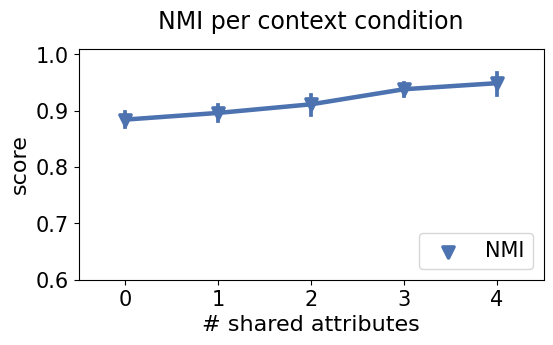

In [106]:
plt.figure(figsize=(6,3))
ax = sns.pointplot(x='level', y='value', data=all_context_dep, hue='metric', 
                   markers=['v', 'o', 's'], palette='deep', scale=1.2)
plt.ylabel('score', fontsize=16)
plt.title('NMI per context condition', fontsize=17, y=1.05)
plt.ylim([0.6,1.01])
plt.xticks(ticks=[0,1,2,3,4], labels=[0,1,2,3,4])
plt.yticks(ticks=[0.6,0.7, 0.8, 0.9, 1.0], fontsize=15)
plt.xlabel('# shared attributes', fontsize=16)
plt.xticks(fontsize=15)
plt.legend(fontsize=15, loc='lower right')
plt.show()

In [141]:
data_list, run_list, level_list,  = [], [], []
NMI_concept_x_context, effectiveness_concept_x_context, consistency_concept_x_context = [], [], []

for d, data in enumerate(datasets):
    for run in range(5):
        
        scores = pickle.load(open(paths[d] + '/' + setting + '/' + str(run) + '/entropy_scores.pkl', 'rb'))
        
        for l, level in enumerate([1,2,3,4,5]):  
            
            data_list.append(data)
            run_list.append(run)
            level_list.append(level)
            
            try: 
                NMI_concept_x_context.append(scores['normalized_mutual_info_concept_x_context'][l])
                effectiveness_concept_x_context.append(scores['effectiveness_concept_x_context'][l])
                consistency_concept_x_context.append(scores['consistency_concept_x_context'][l])
            except: 
                NMI_concept_x_context.append(np.nan)
                effectiveness_concept_x_context.append(np.nan)
                consistency_concept_x_context.append(np.nan)

entropy_concept_x_context = {'data': data_list, 'level': level_list, 'run': run_list, 'NMI': NMI_context_dep, 
                             'effectiveness': effectiveness_context_dep, 'consistency': consistency_context_dep}


In [145]:
scores['normalized_mutual_info_concept_x_context']

array([0.80845024,        nan,        nan,        nan,        nan,
       0.89704255, 0.90559255,        nan,        nan,        nan,
       0.89752851, 0.91459952, 0.92254046,        nan,        nan,
       0.89025306, 0.89885717, 0.91169499, 0.92063456,        nan,
       0.90003507, 0.9040891 , 0.9098118 , 0.9182233 , 0.92825783])

In [144]:
len(entropy_concept_x_context['level'])

750

In [125]:
all_concept_x_context = {}
all_concept_x_context['metric'] = ['NMI'] * 150 #+ ['effectiveness'] * 150 + ['consistency'] * 150
all_concept_x_context['value'] = (entropy_concept_x_context['NMI']# + 
                           #  entropy_dict_concept_x_context['effectiveness'] + 
                            # entropy_dict_concept_x_context['consistency']
                            )
all_concept_x_context['level'] = entropy_concept_x_context['level'] #* 3

/Users/kkobrock/opt/miniconda3/envs/egg/lib/python3.9/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


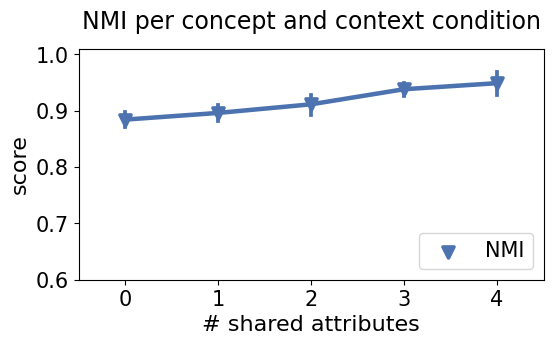

In [127]:
plt.figure(figsize=(6,3))
ax = sns.pointplot(x='level', y='value', data=all_concept_x_context, hue='metric', 
                   markers=['v', 'o', 's'], palette='deep', scale=1.2)
plt.ylabel('score', fontsize=16)
plt.title('NMI per concept and context condition', fontsize=17, y=1.05)
plt.ylim([0.6,1.01])
plt.xticks(ticks=[0,1,2,3,4], labels=[0,1,2,3,4])
plt.yticks(ticks=[0.6,0.7, 0.8, 0.9, 1.0], fontsize=15)
plt.xlabel('# shared attributes', fontsize=16)
plt.xticks(fontsize=15)
plt.legend(fontsize=15, loc='lower right')
plt.show()

## message length and symbol redundancy

In [63]:
context_unaware = False # whether original or context_unaware simulations are evaluated
if context_unaware:
    setting = 'context_unaware'
else:
    setting = 'standard'

In [64]:
ml_dict = {'level': [], 'data set': [], 'run': [], 'message length': []}
for d, dataset in enumerate(datasets): 
    for run in range(5):
        
        # if evaluated after training from interaction this is an array showing the message length
        # per level of concreteness (most abstract --> most concrete)
        ml_hierarchical = pickle.load(open(paths[d] + '/' + setting + '/' + str(run) + 
                                           '/message_length_hierarchical.pkl', 'rb'))
        
        # if evaluated with the callback throughout training, you get an array for each epoch
        if isinstance(ml_hierarchical, dict): 
            ml_hierarchical = ml_hierarchical['message_length_train'][n_epochs]
            
        for level in range(5):
            
            ml_dict['level'].append(level)
            ml_dict['run'].append(run)
            ml_dict['data set'].append(dataset)
            try: 
                ml_dict['message length'].append(ml_hierarchical[level])
            except: 
                ml_dict['message length'].append(np.NaN)

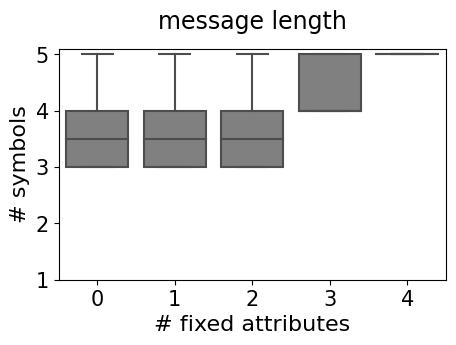

In [65]:
plt.figure(figsize=(5,3))
sns.boxplot(x='level', y='message length', data=ml_dict, color='gray')
plt.xticks(fontsize=15)
plt.yticks(ticks=[1,2,3,4,5], labels=[1,2,3,4,5], fontsize=15)
plt.xlabel('# fixed attributes', fontsize=16)
plt.ylabel('# symbols', fontsize=16)
plt.title('message length', fontsize=17, y=1.05)
plt.show()

In [5]:
symbol_redundancy_dict = {'level': [], 'data set': [], 'run': [], 'symbol frequency': []}

for d, dataset in enumerate(datasets): 
    for run in range(5):
        
        scores = pickle.load(open(paths[d]  + '/' + setting + '/' + str(run) + '/symbol_redundancy.pkl', 'rb'))
            
        for level in range(5):
            
            symbol_redundancy_dict['level'].append(level)
            symbol_redundancy_dict['run'].append(run)
            symbol_redundancy_dict['data set'].append(dataset)
            try: 
                symbol_redundancy_dict['symbol frequency'].append(scores['symbol_redundancy'][level])
            except: 
                symbol_redundancy_dict['symbol frequency'].append(np.NaN)

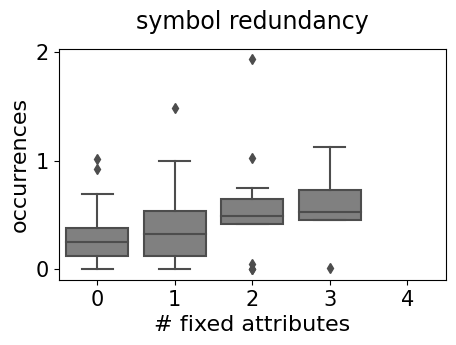

In [7]:
plt.figure(figsize=(5,3))
sns.boxplot(x='level', y='symbol frequency', data=symbol_redundancy_dict, color='gray')
plt.xticks(ticks=[0,1,2,3,4], labels=[0,1,2,3,4], fontsize=15)
plt.yticks(ticks=[0, 1, 2], fontsize=15)
plt.xlabel('# fixed attributes', fontsize=16)
plt.ylabel('occurrences', fontsize=16)
plt.title('symbol redundancy', fontsize=17, y=1.05)
plt.show()

## compositionality

In [36]:
context_unaware = True
if context_unaware:
    setting = 'context_unaware'
else:
    setting = 'standard'

In [37]:
topsim, posdis, bosdis = np.zeros((n_datasets, 5)), np.zeros((n_datasets, 5)), np.zeros((n_datasets, 5))
topsim_specific, posdis_specific, bosdis_specific = np.zeros((n_datasets, 5)), np.zeros((n_datasets, 5)), np.zeros((n_datasets, 5))

for d, dataset in enumerate(datasets): 
    for run in range(5):
        
        topsim_score = pickle.load(open(paths[d] + '/' + setting + '/' + str(run) + '/topsim_final.pkl', 'rb'))
        disent_score = pickle.load(open(paths[d] + '/' + setting + '/' + str(run) + '/posdis_bosdis.pkl', 'rb'))
        topsim[d, run] = topsim_score['topsim_train']
        posdis[d, run] = disent_score['posdis']
        bosdis[d, run] = disent_score['bosdis']
        topsim_specific[d, run] = topsim_score['topsim_specific_train']
        posdis_specific[d, run] = disent_score['posdis_specific']
        bosdis_specific[d, run] = disent_score['bosdis_specific']

In [38]:
for i, d in enumerate(datasets):
    print(d, "topsim:", round(np.mean(topsim[i]), 3), "sd", round(np.std(topsim[i]), 2))

(3,4) topsim: 0.46 sd 0.07
(3,8) topsim: 0.339 sd 0.03
(3,16) topsim: 0.287 sd 0.04
(4,4) topsim: 0.539 sd 0.02
(4,8) topsim: 0.336 sd 0.05
(5,4) topsim: 0.455 sd 0.03


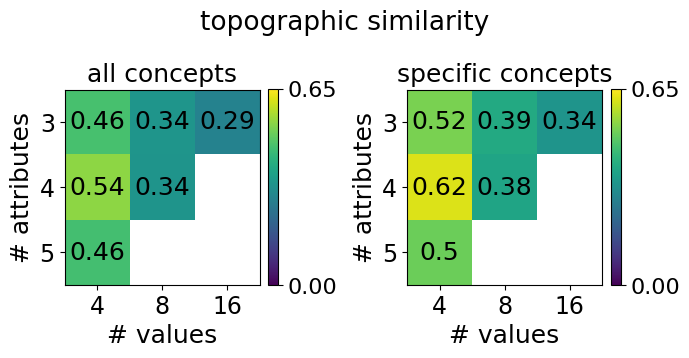

In [39]:
plot_heatmap([topsim, topsim_specific], 'mean', plot_dims=(1,2), ylims=[0.0,0.65], figsize=(7,3.5), 
             titles=['all concepts', 'specific concepts'], suptitle='topographic similarity', suptitle_position=1.)

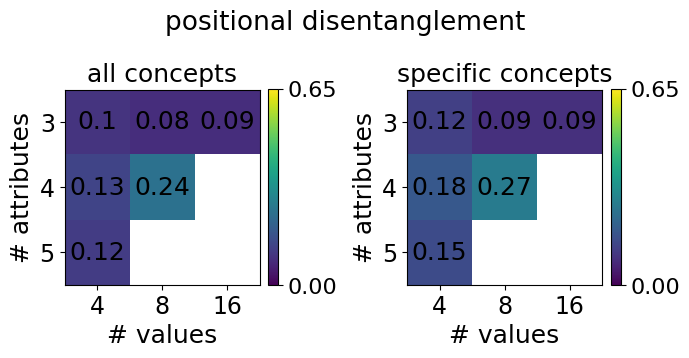

In [33]:
plot_heatmap([posdis, posdis_specific], 'mean', plot_dims=(1,2), ylims=[0.0,0.65], figsize=(7,3.5),
             titles=['all concepts', 'specific concepts'], suptitle='positional disentanglement', suptitle_position=1.)

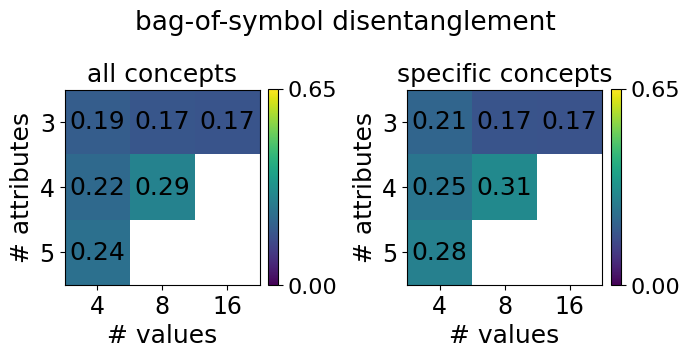

In [34]:
plot_heatmap([bosdis, bosdis_specific], 'mean', plot_dims=(1,2), ylims=[0.0,0.65], figsize=(7,3.5),
             titles=['all concepts', 'specific concepts'], suptitle='bag-of-symbol disentanglement', suptitle_position=1.)

In [35]:
# compositionality scores for each data set

compositionality_scores = {'dataset':[], 'run':[], 'metric':[], 'data':[], 'score':[]}

for d, dataset in enumerate(datasets): 
    for run in range(5):
        
        topsim = pickle.load(open(paths[d] + '/' + setting + '/' + str(run) + '/topsim_final.pkl', 'rb'))
        disent = pickle.load(open(paths[d] + '/' + setting + '/' + str(run) + '/posdis_bosdis.pkl', 'rb'))
        
        for metric in ['topsim', 'posdis', 'bosdis']:
            #for data in ['all', 'concrete']: 
            for data in ['all']:
                
                compositionality_scores['dataset'].append(dataset)
                compositionality_scores['run'].append(run)
                compositionality_scores['metric'].append(metric)
                compositionality_scores['data'].append(data)
                
                append = '' if data == 'all' else '_max_relevance'
                    
                if metric == 'topsim':
                    compositionality_scores['score'].append(topsim['topsim' + append + '_train'])
                if metric == 'posdis':
                    compositionality_scores['score'].append(disent['posdis' + append])
                if metric == 'bosdis':
                    compositionality_scores['score'].append(disent['bosdis' + append])

compositionality_scores = pd.DataFrame(compositionality_scores)

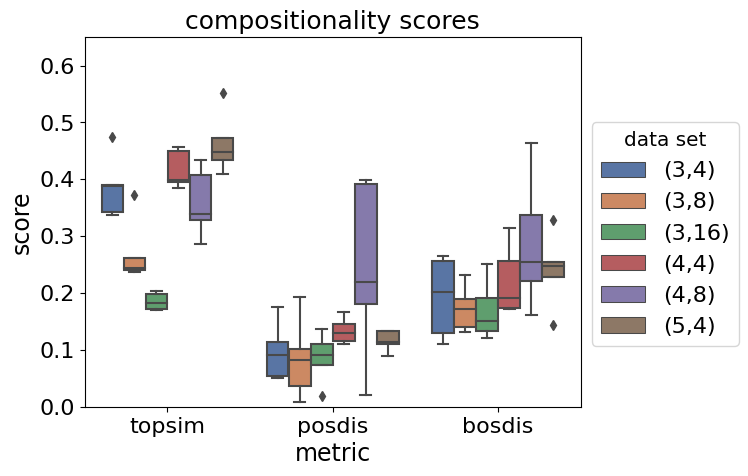

In [40]:
sns.boxplot(x='metric', y='score', data=compositionality_scores[compositionality_scores.data=='all'], 
            hue='dataset', palette='deep')
plt.xlabel(xlabel='metric', fontsize=17)
plt.ylabel(ylabel='score', fontsize=17)
plt.xticks(fontsize=16)
plt.yticks(ticks=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6], fontsize=16)
plt.ylim(0, 0.65)
legend = plt.legend(fontsize=16, title='data set', bbox_to_anchor=(1., 0.8))
plt.setp(legend.get_title(),fontsize='x-large')
plt.title('compositionality scores', fontsize=18)
plt.show()

In [ ]:
# Not done (yet)
# compositionality scores for different vocab size factors 

compositionality_scores = {'vs factor':[], 'run':[], 'metric':[], 'score':[]}

for vsf in [1, 2, 3, 4]: 
    for run in range(5):
        
        path = 'results/(4,8)_sample_scaling_10_balanced_False_vsf_' + str(vsf) + '/'
        
        topsim = pickle.load(open(path + 'standard/' + str(run) + '/topsim_final.pkl', 'rb'))
        disent = pickle.load(open(path + 'standard/' + str(run) + '/posdis_bosdis.pkl', 'rb'))
        
        for metric in ['topsim', 'posdis', 'bosdis']:
                
                compositionality_scores['vs factor'].append(vsf)
                compositionality_scores['run'].append(run)
                compositionality_scores['metric'].append(metric)

                if metric == 'topsim':
                    compositionality_scores['score'].append(topsim['topsim_train'])
                if metric == 'posdis':
                    compositionality_scores['score'].append(disent['posdis'])
                if metric == 'bosdis':
                    compositionality_scores['score'].append(disent['bosdis'])

compositionality_scores = pd.DataFrame(compositionality_scores)

## co-occurrences

In [ ]:
# Not done (yet)
full_plot = False

fig = plt.figure(figsize=(12,3))

for d, dim in enumerate(datasets): 
    
    data = datasets[d]
    path = paths[d]
    vs_factor = int(path[-2])
    vocab_size = (n_values[d] + 1) * vs_factor + 1
    colors = plt.cm.jet(np.linspace(0,1,vocab_size))
    
    average_cooccurences = []
    
    plt.subplot(1,6,d+1)
    
    for run in range(5):
        
        cooccurences = pickle.load(open(paths[d] + 'standard/' + str(run) + '/normalized_cooccurrence.pkl', 'rb'))
        indices = np.flip(np.argsort(cooccurences[:,-1]))
        cooccurences = cooccurences[indices]
        average_cooccurences.append(cooccurences)
        
    average_cooccurences = np.flip(np.mean(average_cooccurences, axis=0), axis=1)
    
    data_dict = {}
    data_dict['symbol rank'] = []
    data_dict['level'] = []
    data_dict['value'] = []
    for symbol in indices:
        for level in range(average_cooccurences.shape[1]):
            data_dict['symbol rank'].append(symbol+1)
            data_dict['level'].append(level)
            data_dict['value'].append(average_cooccurences[symbol, level])
    
    if full_plot:
        g = sns.heatmap(average_cooccurences, cmap='viridis')
        plt.yticks(ticks=[0.5,vocab_size-1.5], labels=[1,vocab_size], fontsize=14)
    else: 
        g = sns.heatmap(average_cooccurences[0:10,:], cmap='viridis')
        plt.yticks(ticks=[0.5,9.5], labels=[1,10], fontsize=14, rotation=0)
    cax = plt.gcf().axes[-1]
    cax.tick_params(labelsize=13)
    for _, spine in g.spines.items():
        spine.set_visible(True)
    #plt.xlabel('# relevant attributes', fontsize=14)
    #plt.ylabel('symbol rank', fontsize=14)
    plt.xticks(ticks=np.arange(n_attributes[d])+0.5, labels=range(1,n_attributes[d]+1), fontsize=14)
    plt.title(data, fontsize=14)
    
    fig.text(0.5, -0.05, '# relevant attributes', ha='center', va='center', fontsize=15, alpha=0.3)
    fig.text(-0.01, 0.5, 'symbol rank', ha='center', va='center', rotation='vertical', fontsize=15, alpha=0.3)

plt.tight_layout()

#### Bootstrapping Confidence Intervals

In [ ]:
# how to bootstrap CIs
from scipy.stats import bootstrap
rng = np.random.default_rng()
from scipy.stats import norm
dist = norm(loc=2, scale=4)  # our "unknown" distribution
data = dist.rvs(size=100, random_state=rng)
print(data)
data = (data,)
print(type(data[0]))
res = bootstrap(data, np.std, confidence_level=0.9, random_state=rng, n_resamples=1000, method='basic')
res